In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,mean_squared_error
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, Binarizer

df = pd.read_csv('Iris.csv')
df

D:\App\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [2]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [5]:
# Targe
t=df['Species']
df.drop('Id', axis=1, inplace=True)

In [13]:
# mp={'Iris-setosa':0,'Iris-versicolor':1,'Iris-virginica':2}
# ls=[]
# for i in Target:
#     ls.append(mp[i])
# Target=ls
df['Species'], _= pd.factorize(df['Species'])

<AxesSubplot:xlabel='PetalWidthCm'>

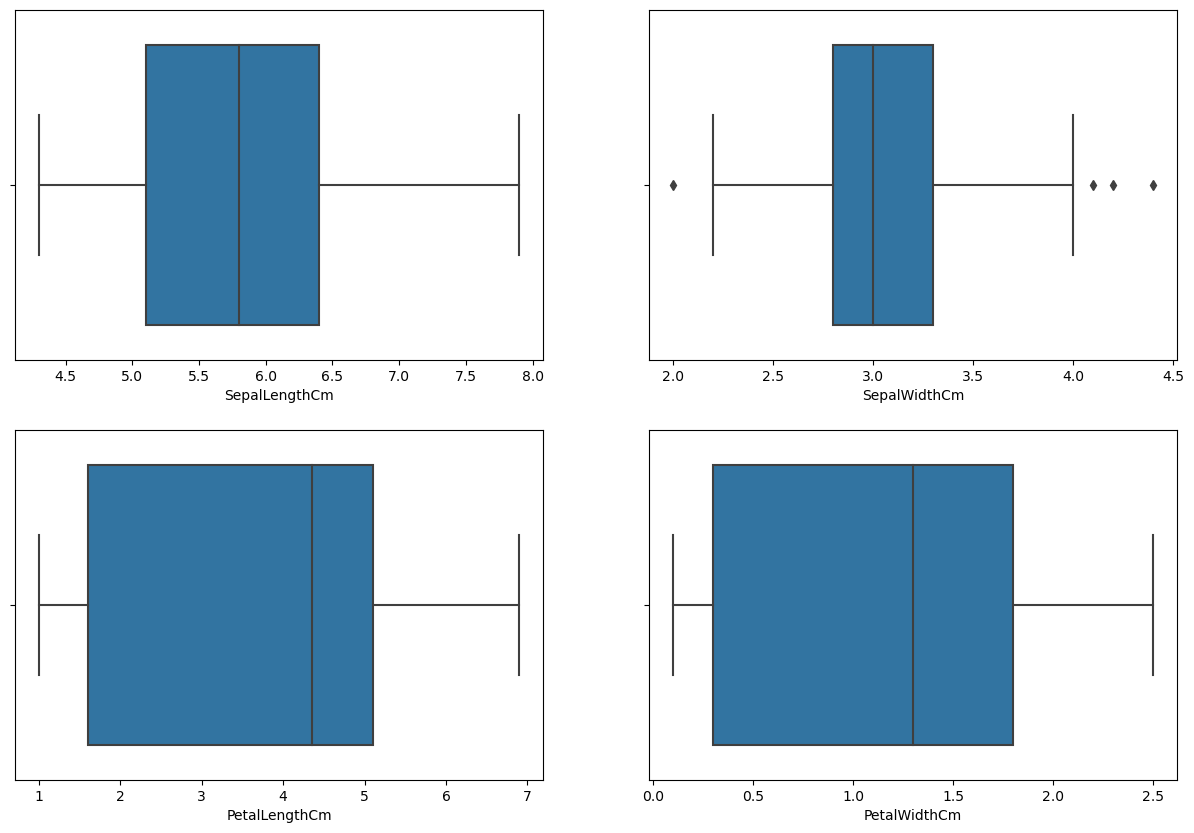

In [317]:
fig, ax = plt.subplots(2,2, figsize=(15,10))

sns.boxplot(x=df['SepalLengthCm'], ax=ax[0,0])
sns.boxplot(x=df['SepalWidthCm'], ax=ax[0,1])
sns.boxplot(x=df['PetalLengthCm'], ax=ax[1,0])
sns.boxplot(x=df['PetalWidthCm'], ax=ax[1,1])

In [318]:
scaler1 =  StandardScaler()
scaler2 = MinMaxScaler()
binarizer = Binarizer()

In [319]:
SepalLengthCm = df['SepalLengthCm'].values.reshape(-1,1)
SepalLengthCm_New = scaler1.fit_transform(SepalLengthCm)

In [320]:
df['SepalLengthCm'] = SepalLengthCm_New

In [321]:
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,-0.900681,3.5,1.4,0.2,0
1,-1.143017,3.0,1.4,0.2,0
2,-1.385353,3.2,1.3,0.2,0
3,-1.506521,3.1,1.5,0.2,0
4,-1.021849,3.6,1.4,0.2,0
...,...,...,...,...,...
145,1.038005,3.0,5.2,2.3,2
146,0.553333,2.5,5.0,1.9,2
147,0.795669,3.0,5.2,2.0,2
148,0.432165,3.4,5.4,2.3,2


In [322]:
SepalWidthCm = df['SepalWidthCm'].values.reshape(-1,1)
SepalWidthCm_New = scaler2.fit_transform(SepalWidthCm)

In [323]:
df['SepalWidthCm'] = SepalWidthCm_New
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,-0.900681,0.625000,1.4,0.2,0
1,-1.143017,0.416667,1.4,0.2,0
2,-1.385353,0.500000,1.3,0.2,0
3,-1.506521,0.458333,1.5,0.2,0
4,-1.021849,0.666667,1.4,0.2,0
...,...,...,...,...,...
145,1.038005,0.416667,5.2,2.3,2
146,0.553333,0.208333,5.0,1.9,2
147,0.795669,0.416667,5.2,2.0,2
148,0.432165,0.583333,5.4,2.3,2


## Data Splitting

In [324]:
from catboost import CatBoostClassifier
from xgboost import XGBClassifier

In [325]:
X = df.drop('Species', axis=1)
y = df['Species']

In [326]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

In [327]:
xgb = XGBClassifier()
xgb.fit(X_train, y_train)

y_pred = xgb.predict(X_test)
accuracy_score(y_test, y_pred)

1.0

In [328]:
catb = CatBoostClassifier()
catb.fit(X_train, y_train)

y_pred = catb.predict(X_test)
accuracy_score(y_test, y_pred)

Learning rate set to 0.071017
0:	learn: 1.0146354	total: 856us	remaining: 856ms
1:	learn: 0.9489905	total: 1.52ms	remaining: 761ms
2:	learn: 0.8910779	total: 2.13ms	remaining: 708ms
3:	learn: 0.8372660	total: 2.74ms	remaining: 683ms
4:	learn: 0.7832054	total: 3.58ms	remaining: 712ms
5:	learn: 0.7336415	total: 4.27ms	remaining: 708ms
6:	learn: 0.6944336	total: 4.89ms	remaining: 694ms
7:	learn: 0.6585809	total: 5.49ms	remaining: 681ms
8:	learn: 0.6199920	total: 5.91ms	remaining: 650ms
9:	learn: 0.5878145	total: 6.5ms	remaining: 643ms
10:	learn: 0.5604276	total: 7.1ms	remaining: 639ms
11:	learn: 0.5330482	total: 7.71ms	remaining: 635ms
12:	learn: 0.5097065	total: 8.35ms	remaining: 634ms
13:	learn: 0.4857335	total: 9.04ms	remaining: 637ms
14:	learn: 0.4666267	total: 9.74ms	remaining: 639ms
15:	learn: 0.4446979	total: 10.3ms	remaining: 635ms
16:	learn: 0.4254758	total: 11ms	remaining: 634ms
17:	learn: 0.4115130	total: 11.6ms	remaining: 632ms
18:	learn: 0.3953283	total: 12ms	remaining: 620ms

299:	learn: 0.0196377	total: 175ms	remaining: 407ms
300:	learn: 0.0195783	total: 175ms	remaining: 407ms
301:	learn: 0.0194579	total: 176ms	remaining: 406ms
302:	learn: 0.0193956	total: 176ms	remaining: 406ms
303:	learn: 0.0193315	total: 177ms	remaining: 405ms
304:	learn: 0.0192755	total: 177ms	remaining: 404ms
305:	learn: 0.0191731	total: 178ms	remaining: 403ms
306:	learn: 0.0190853	total: 178ms	remaining: 403ms
307:	learn: 0.0190215	total: 179ms	remaining: 402ms
308:	learn: 0.0189616	total: 179ms	remaining: 401ms
309:	learn: 0.0188670	total: 180ms	remaining: 401ms
310:	learn: 0.0187807	total: 181ms	remaining: 400ms
311:	learn: 0.0187047	total: 181ms	remaining: 399ms
312:	learn: 0.0186374	total: 182ms	remaining: 398ms
313:	learn: 0.0185788	total: 182ms	remaining: 398ms
314:	learn: 0.0184945	total: 183ms	remaining: 397ms
315:	learn: 0.0184334	total: 183ms	remaining: 396ms
316:	learn: 0.0183711	total: 184ms	remaining: 396ms
317:	learn: 0.0183155	total: 184ms	remaining: 395ms
318:	learn: 

635:	learn: 0.0080454	total: 355ms	remaining: 203ms
636:	learn: 0.0080264	total: 356ms	remaining: 203ms
637:	learn: 0.0080122	total: 356ms	remaining: 202ms
638:	learn: 0.0079922	total: 357ms	remaining: 202ms
639:	learn: 0.0079798	total: 357ms	remaining: 201ms
640:	learn: 0.0079690	total: 358ms	remaining: 200ms
641:	learn: 0.0079569	total: 358ms	remaining: 200ms
642:	learn: 0.0079402	total: 359ms	remaining: 199ms
643:	learn: 0.0079265	total: 360ms	remaining: 199ms
644:	learn: 0.0079128	total: 360ms	remaining: 198ms
645:	learn: 0.0078986	total: 361ms	remaining: 198ms
646:	learn: 0.0078843	total: 361ms	remaining: 197ms
647:	learn: 0.0078664	total: 362ms	remaining: 197ms
648:	learn: 0.0078514	total: 362ms	remaining: 196ms
649:	learn: 0.0078349	total: 363ms	remaining: 195ms
650:	learn: 0.0078219	total: 364ms	remaining: 195ms
651:	learn: 0.0078081	total: 364ms	remaining: 194ms
652:	learn: 0.0077975	total: 365ms	remaining: 194ms
653:	learn: 0.0077785	total: 365ms	remaining: 193ms
654:	learn: 

970:	learn: 0.0050024	total: 540ms	remaining: 16.1ms
971:	learn: 0.0049967	total: 541ms	remaining: 15.6ms
972:	learn: 0.0049917	total: 541ms	remaining: 15ms
973:	learn: 0.0049876	total: 542ms	remaining: 14.5ms
974:	learn: 0.0049787	total: 542ms	remaining: 13.9ms
975:	learn: 0.0049703	total: 543ms	remaining: 13.4ms
976:	learn: 0.0049664	total: 544ms	remaining: 12.8ms
977:	learn: 0.0049624	total: 544ms	remaining: 12.2ms
978:	learn: 0.0049560	total: 545ms	remaining: 11.7ms
979:	learn: 0.0049505	total: 546ms	remaining: 11.1ms
980:	learn: 0.0049456	total: 546ms	remaining: 10.6ms
981:	learn: 0.0049399	total: 547ms	remaining: 10ms
982:	learn: 0.0049312	total: 548ms	remaining: 9.47ms
983:	learn: 0.0049253	total: 548ms	remaining: 8.91ms
984:	learn: 0.0049204	total: 549ms	remaining: 8.36ms
985:	learn: 0.0049160	total: 549ms	remaining: 7.8ms
986:	learn: 0.0049114	total: 550ms	remaining: 7.25ms
987:	learn: 0.0049047	total: 551ms	remaining: 6.69ms
988:	learn: 0.0049007	total: 551ms	remaining: 6.13m

1.0

In [329]:
xgb = XGBClassifier()
xgb.fit(X_train, y_train)

y_pred = xgb.predict(X_test)
accuracy_score(y_test, y_pred)

1.0